In [90]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from pyrcn.echo_state_network import ESNRegressor

structural_mask = pd.read_csv('data/sub-CON01_ses-preop.csv',header=None)
structural_mask = (structural_mask > 0).astype(int)
# sns.heatmap(structural_mask)

In [91]:
df = pd.read_csv('data/sub-CON01_ses-preop_task-rest_space-MNI152NLin2009cAsym_atlas-Gordon_desc-timeseries_bold.tsv', header=None)
df = df.T


In [92]:
x = df.iloc[111]
y = df.iloc[222]
x = x.values.reshape(-1,1)
y = y.values.reshape(-1,1)

In [103]:
train_len = int(len(x) * 0.6)

X_train1 = np.array(x[:train_len]).reshape(-1, 1)
X_train = np.concatenate((X_train1, X_train1))

X_test1 = np.array(x[train_len:]).reshape(-1, 1)
X_test = np.concatenate((X_test1, X_test1))


y_train1 = np.array(y[:train_len])
y_train = np.concatenate((y_train1, y_train1))


y_test1 = np.array(y[train_len:])
y_test = np.concatenate((y_test1, y_test1))


In [95]:
reg = ESNRegressor(hidden_layer_size=30)

In [96]:
reg.fit(X=X_train, y=y_train)

ESNRegressor(input_to_node=InputToNode(hidden_layer_size=30),
             node_to_node=NodeToNode(hidden_layer_size=30),
             regressor=IncrementalRegression(), requires_sequence=False)

In [97]:
y_pred = reg.predict(X_test)


In [98]:
# correlation
np.corrcoef(y_test.reshape(-1), y_pred.reshape(-1))[0, 1]

0.28436947613811236

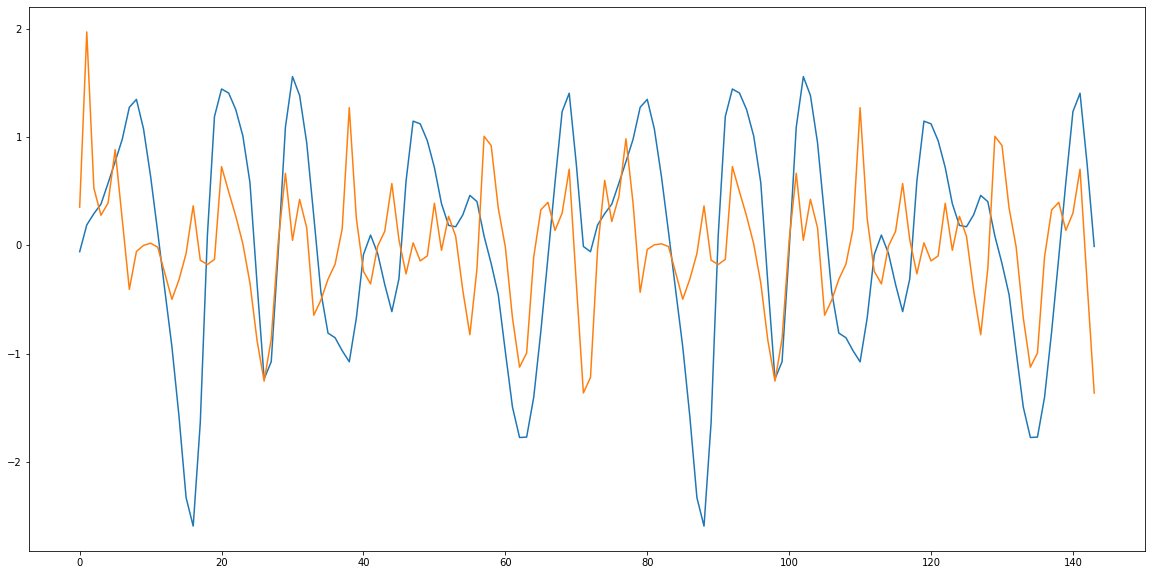

In [99]:
plt.figure(figsize=(20, 10))
plt.plot(y_test, label='y_test')
plt.plot(y_pred, label='y_pred')

In [100]:
# correlation on trianing set
y_pred_train = reg.predict(X_train)
np.corrcoef(y_train.reshape(-1), y_pred_train.reshape(-1))[0, 1]

0.682939965305985

In [101]:
print("params  train   test")
for reservoir_size in [3, 5, 10, 15, 20, 25, 30, 35, 40, 60, 100, 200, 300, 400]:
    reg = ESNRegressor(hidden_layer_size=reservoir_size)
    reg.fit(X=X_train, y=y_train)

    y_pred = reg.predict(X_test)
    test_corr = np.corrcoef(y_test.reshape(-1), y_pred.reshape(-1))[0, 1]

    y_pred_train = reg.predict(X_train)
    train_corr = np.corrcoef(y_train.reshape(-1), y_pred_train.reshape(-1))[0, 1]
    print(f"{reservoir_size:6} {train_corr:6.2f} {test_corr:6.2f}")

params  train   test
     3   0.39   0.31
     5   0.46   0.30
    10   0.49   0.23
    15   0.58   0.31
    20   0.62   0.37
    25   0.60   0.31
    30   0.68   0.28
    35   0.72   0.09
    40   0.71   0.32
    60   0.78   0.28
   100   0.98   0.08
   200   1.00   0.13
   300   1.00   0.20
   400   1.00   0.25


In [102]:
np.corrcoef(y_test.reshape(-1), X_test.reshape(-1))[0, 1]

0.3002823402066563